# Ensemble Prediction Techniques

<img src='../Images/wisdom-of-crowds.jpg' width='300' />

<img src='../Images/superforecasting.jpg' width='300' />

<img src='../Images/kaggle-home.png' width='500' />

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def clf_preds(accuracy, truth_vector):
    # accuracy of classifier
    # truth_vector is the actual value of the target
    preds = []
    for i in range(len(truth)):
        pred = np.random.choice([truth[i], 1-truth[i]], p=[accuracy, 1-accuracy])
        preds.append(pred)

    return preds

In [3]:
# generate num_clfs number of predictors -- an ensemble of predictors
def generate_clfs(num_clfs, accuracy, truth_vector):
    clfs = [clf_preds(accuracy, truth_vector) for i in range(num_clfs)]
    return clfs

In [4]:
# majority vote result for a prediction from each member of the ensemble
def majority_vote(pred_vector):
    vote_result = stats.mode(pred_vector)[0][0]
    return vote_result

In [5]:
def ensemble_accuracy(num_clfs, clf_accuracy, truth_vector):
    # Generate the ensemble of classifiers and their predictions
    clfs = generate_clfs(num_clfs, clf_accuracy, truth_vector)
    
    # Each clf in clfs contains a list of predictions associated with a particular classifier
    # Transpose those values to get the first set of predictions
    # This set of predictions can then be voted on to find the majority result
    preds = np.transpose(clfs)
    majority_results = [majority_vote(pred) for pred in preds]
    
    # Compare the majority_results with the truth_vector
    correct = 0
    for i in range(len(truth_vector)):
        if majority_results[i] == truth_vector[i]:
            correct += 1
        
    ensemble_accuracy = correct/len(truth_vector)
    
    return ensemble_accuracy

In [6]:
# The truth (training data) is as follows
truth = np.random.choice([0,1], 1000, p=[0.7, 0.3])
#truth

In [7]:
clfs = [clf_preds(0.55, truth) for i in range(3)]
np.transpose(clfs)

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 1, 0],
       [0, 1, 1],
       [1, 1, 0]])

In [8]:
%time ensemble_accuracy(100, 0.51, truth)

Wall time: 1.61 s


0.604

## The Power of Ensembles

<img src='../Images/power-of-ensemble-predictors.png' width='400' />

In [9]:
#### CAUTION: TAKES TIME TO RUN ####
# 10 classifiers, data has 1000 rows, each classifier's accuracy varies from
# 0 to 1
clf_accs = np.arange(0,1.02,0.02)
%time ensemble_accs = [ensemble_accuracy(100, x, truth) for x in clf_accs]
#ensemble_accs

Wall time: 1min 34s


The accuracy of a majority-vote system from an ensemble of weak classifiers is a big improvement on the accuracy of any individual classifier in the ensemble.

We can see how an ensemble of classifiers does under the majority-vote scheme as the predictive accuracy of the individual classifiers in the ensemble vary from 0 (always wrong) to 1 (always right).

Wall time: 89.2 ms


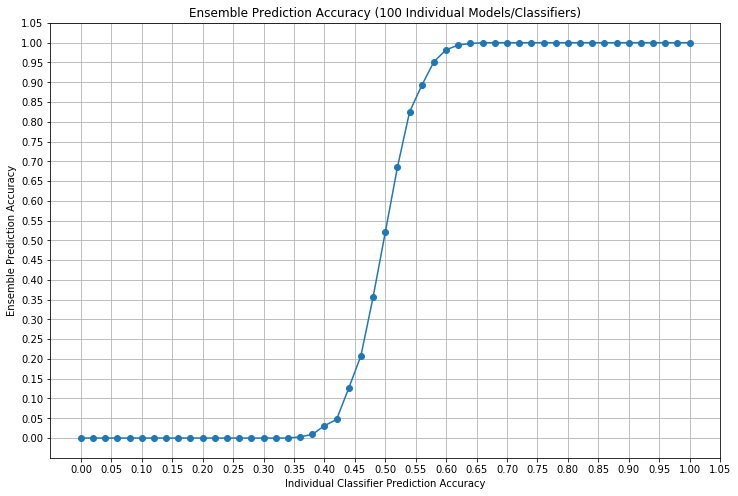

In [10]:
%%time

fig = plt.figure(1, figsize=(12, 8))

# Create an axes instance
ax = fig.add_subplot(111)
plt.title('Ensemble Prediction Accuracy (100 Individual Models/Classifiers)')
plt.xlabel('Individual Classifier Prediction Accuracy')
plt.ylabel('Ensemble Prediction Accuracy')
ax.set_xticks(np.arange(0, 1.1, 0.05))
ax.set_yticks(np.arange(0, 1.1, 0.05))
plt.grid()

# Create the plot
plt.plot(clf_accs, ensemble_accs, marker='o');

When individual classifier accuracy is lower than 0.5 -- i.e., when the classifiers are worse than randomly predicting a result, the ensemble accuracy is *a lot lower* than the accuracy of the individual classifiers.

However, and this is the interesting and surprising thing: When individual classifier accuracy is even just a bit above the random guessing accuracy of 0.5, the ensemble's accuracy is *a lot higher* than the accuracy of any individual classifier in the ensemble.

We've asked 100 people the same question and they've pretty much guessed at random. But pull their results together and take the majority value of their predictions and we've got a pretty accurate prediction scheme!

How is this possible? What's going on?

The key question for the majority-vote scheme is:

> For a given number of classifiers in the ensemble, what is the probability that the majority of outcomes is the same as the right/correct outcome?

Suppose we have 5 slightly biased coins (i.e., classifiers) -- each one having a 0.51 probability of heads. And suppose heads is the right outcome -- the correct prediction. So what we've done is picked coins that are slightly better than random at predicting the right result. Only *slightly* better though.

Let's toss these 5 coins and here's what we get...or better yet, let's toss 5, 10, 15, ..., 500 of these coins and see how the majority value of the prediction changes as the number of coins increases.

<img src="../Images/key-question-for-ensembles.png" width="600" />

In [11]:
# Toss 5 coins, each with 0.51 probability each of heads
outcomes = np.random.choice(['heads', 'tails'], 5, p=[0.51, 1-0.51])
majority_outcome = majority_vote(outcomes)
#print("Tosses: {}".format(outcomes))
print("Majority Value: {}".format(majority_outcome))

Majority Value: tails


C:\Users\JSubrama\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [12]:
%%time
# Toss n coins and see if the majority of outcome is heads (1) or tails (0)
clf_accuracy = 0.51
num_clfs = 100
outcomes = np.random.choice([1,0], num_clfs, p=[clf_accuracy, 1-clf_accuracy])
# Check majority value as number of classifiers increases
majority_vals = []
outcome_ratios = []
for i in range(1, num_clfs+1):
    #print(outcomes[:i])
    outcome_subset = outcomes[:i]
    majority = majority_vote(outcome_subset)
    majority_vals.append(majority)
    # number of 1s (i.e., heads)
    num_heads = list(outcome_subset).count(1)
    outcome_ratio = num_heads/len(outcome_subset)
    outcome_ratios.append(outcome_ratio)
    
# We now have values for the following: 
## outcomes, majority_vals, outcome_ratios
print(majority_vals)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Wall time: 12 ms


The majority value jumps around even when the number of coins tossed is high.

However, the majority value jumps around less as the number of coins tossed grows larger and larger.

Let's get a better view of this...

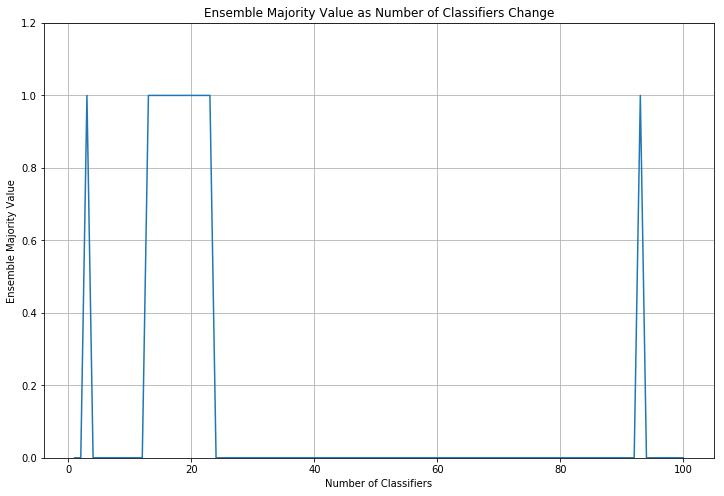

In [13]:
fig = plt.figure(1, figsize=(12, 8))

# Create an axes instance
ax = fig.add_subplot(111)
plt.title('Ensemble Majority Value as Number of Classifiers Change')
plt.xlabel('Number of Classifiers')
plt.ylabel('Ensemble Majority Value')
#ax.set_xticks(np.arange(0, 1.1, 0.05))
#ax.set_yticks(np.arange(0, 1.1, 0.05))
plt.ylim([0,1.2])
plt.grid()

# Create the plot
plt.plot(range(1, num_clfs+1), majority_vals);

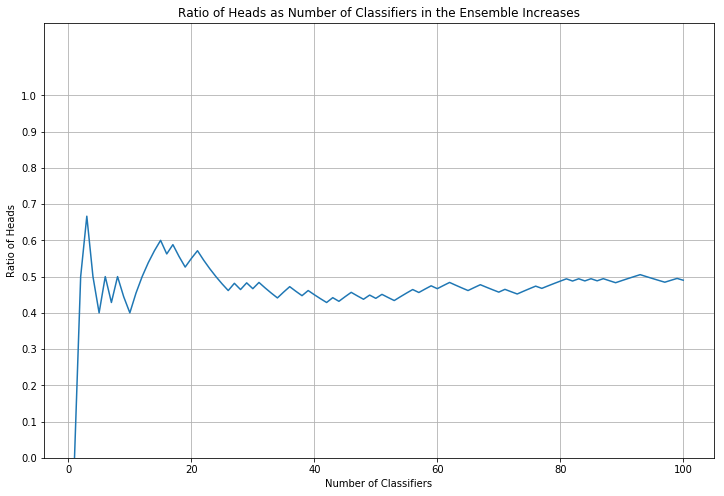

In [14]:
fig = plt.figure(1, figsize=(12, 8))

# Create an axes instance
ax = fig.add_subplot(111)
plt.title('Ratio of Heads as Number of Classifiers in the Ensemble Increases')
plt.xlabel('Number of Classifiers')
plt.ylabel('Ratio of Heads')
#ax.set_xticks(np.arange(0, 1.1, 0.05))
ax.set_yticks(np.arange(0, 1.1, 0.1))
plt.ylim([0,1.2])
#plt.xlim([0,100])
plt.grid()

# Create the plot
plt.plot(range(1, num_clfs+1), outcome_ratios);

It takes quite a few classifiers "ensembled" together, but somewhere in the vicinity of an ensemble with 100 to 150 classifiers, the majority value is mostly going to give the right prediction!

As the accuracy of each individual classifier increases, we need fewer and fewer of them in the ensemble to guarantee that the majority value of their predictions will always be correct.

Let's check this...

## Ways to create ensembles

- Take the same classifier/model and copy it many times over. Use a different subset of the training dataset to train each of the models.
 - Bootstrap Aggregation (Bagging) and Pasting
 - Random Forest
 - Boosting
- Use different classifiers and train each one on the same training dataset (e.g., Stacking)

Ensemble methods work best when each model's prediction is independent of the others and the errors made by one model is different from the errors made by any of the others.

## Bagging and Pasting

<img src='../Images/bagging-pasting.png' width='400' />

A classic paper in this field is well worth reading -- especially if you're taking a class in statistics.
https://www.vanderbilt.edu/psychological_sciences/graduate/programs/quantitative-methods/quantitative-content/diaconis_efron_1983.pdf

## Random Forest

<img src='../Images/random-forests.png' width='400' />

## Boosting

<img src='../Images/boosting.png' width='400' />

## Stacking

<img src='../Images/stacking.png' width='400' />

## Summary

- Ensembles are a great way to improve prediction accuracy.
- That simple predictors/models can be aggregated to produce a predictor with much higher accuracy is a surprising and welcome result!
- There are 2 ways to construct ensembles:
 - use the same model with different training datasets, or 
 - use different models with the same training dataset
- Ensemble methods work best when each model's prediction is independent of the others and the errors made by one model is different from the errors made by any of the others.